In [134]:
import networkx as nx

Number of nodes: 34
Number of edges: 78
Nodes: [(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]

Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 

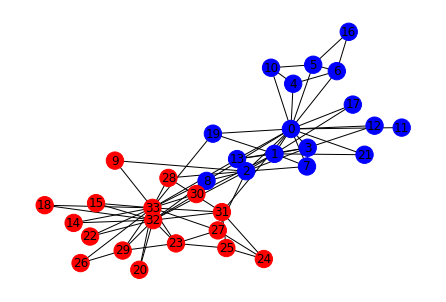

In [135]:
G = nx.karate_club_graph()
colormap = ["blue" if data["club"] == "Mr. Hi" else "red" for _, data in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=colormap)
print("Number of nodes:", G.order())
print("Number of edges:", G.size())
print("Nodes:", G.nodes(data=True), end="\n\n")
print("Edges:", G.edges,end="\n\n")

# Node Features

<b>Node Classification Tasks</b>

Given a graph G = (V,E) where a subset of nodes from V have a label, use the graph structure to assign the most likely
label to the rest of the nodes that have no label. In order to perform this machine learning task, a set of <b>features</b>
must be designed. These features must represent as close as possible the topological structure of the graph. Multiple
types of features can be obtained from nodes. They can be categorized as:

<b> Importance-Based Features </b>

Capture the importance of a node in a graph. Useful for predicting influential nodes in a graph. Example: predicting influential users in a social network.
* Node degree: counts the number of neighboring nodes.
* Node centrality: models the importance of neighboring nodes.

<b> Structure-Based Features </b>

Capture topological properties of a local neighborhood around a node. Useful for predicting a particular role a node plays in a graph. Example: predicting protein functionality in a protein-protein interaction network.

* Node degree: counts the number of neighboring nodes.
* Clustering Coefficient: measures how connected neighboring nodes are.
* Graphlet degree vector: counts the occurrences of different graphlets.

### Node Degree

The degree of a node is simply the number of edges (neighbors) the node has. This feature reveals how well connected a node is.
In the case of the karate club graph, the two nodes with highest degree are precisely the administrator and the instructor who
split the club in two. Their node degree reveal that they were the two most influential people in the network. A drawback of this
representation is that it treats all neighbors equally, even though some could be more relevant than others. Also, nodes with the same degree are indistinguishable from one another, even if they are on different parts of the network.

In [136]:
print("Karate Club node degrees (node, degree):", G.degree)
print("Top 2 Most Connected Nodes:", [node for node, _ in sorted(G.degree, key=lambda x: x[1], reverse=True)[:2]])

Karate Club node degrees (node, degree): [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
Top 2 Most Connected Nodes: [33, 0]


In [137]:
degrees = {}
for node, degree in G.degree:
    if degree in degrees:
        degrees[degree].append(node)
    else:
        degrees[degree] = [node]

print("Nodes with Degree:")
for degree in sorted(degrees):
    print(f"{degree}: {degrees[degree]}")

print("\nDegree Histogram:", nx.degree_histogram(G))

Nodes with Degree:
1: [11]
2: [9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]
3: [4, 10, 19, 24, 25, 28]
4: [5, 6, 7, 27, 29, 30]
5: [8, 13, 23]
6: [3, 31]
9: [1]
10: [2]
12: [32]
16: [0]
17: [33]

Degree Histogram: [0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


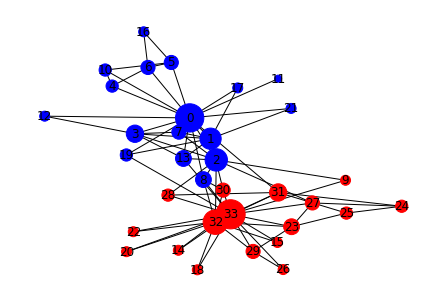

In [138]:
nx.draw(G, with_labels=True, node_size=[50*degree for _, degree in sorted(G.degree, key=lambda x: x[0])], node_color=colormap)

For directed graphs, nodes have "in degrees" and "out degrees" that represent the number of edges coming to the node
and the number of edges going out of the node, respectivelly.

Degrees: [(0, 3), (1, 3), (2, 2), (3, 2), (4, 2)]
In degrees: [(0, 1), (1, 2), (2, 1), (3, 0), (4, 2)]
Out degrees: [(0, 2), (1, 1), (2, 1), (3, 2), (4, 0)]


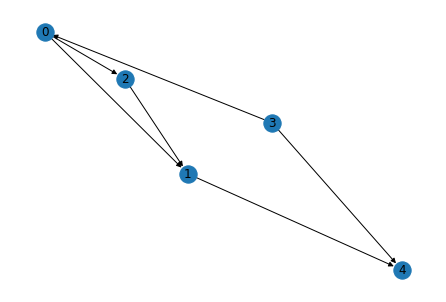

In [139]:
Gaux = nx.DiGraph()
Gaux.add_nodes_from([0,1,2,3,4])
Gaux.add_edges_from([(0,1), (0,2), (3,0), (1,4), (2,1),(3,4)])
nx.draw(Gaux, with_labels=True)
print("Degrees:", Gaux.degree)
print("In degrees:", Gaux.in_degree)
print("Out degrees:", Gaux.out_degree)

### Node Centrality

Node centrality tries to capture the node <b>importance</b> in the graph.

There are multiple ways to model importance: 
* Eigenvector Centrality
* Betweenness Centrality
* Closeness Centrality
* Others...

#### Eigenvector Centrality

A node v is important if v is surrounded by important neighbor nodes u in N(v).

<p align="center"><img src="http://www.sciweavers.org/tex2img.php?eq=c_v%20%3D%20%5Cfrac%7B1%7D%7B%5Clambda%7D%20%20%5Csum_%7Bu%20%5Cin%20%20N%28v%29%7D%20c_u%20%5CLongleftrightarrow%20%5Clambda%20c%20%3D%20Ac&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="c_v = \frac{1}{\lambda}  \sum_{u \in  N(v)} c_u \Longleftrightarrow \lambda c = Ac" width="233" height="51" /></p>

* lambda is some positive constant.
* A is the adjacency matrix.
* c is the centrality vector (rightmost equation). It is initialized as 1/len(G) for every node.

After a number of iterations of the Power Method, the algorithm converges.

[NetworkX Implementation](https://networkx.org/documentation/networkx-1.10/_modules/networkx/algorithms/centrality/eigenvector.html#eigenvector_centrality)

In [140]:
eigen_centralities = nx.eigenvector_centrality(G)
print("Eigenvector Centralities:", eigen_centralities, end="\n\n")
print("Largest centrality score (node, score):", max(eigen_centralities.items(), key=lambda x: x[1]))
print("Smallest centrality score (node, score):", min(eigen_centralities.items(), key=lambda x: x[1]))
print(f"Node 0 score: {eigen_centralities[0]}\nNode 33 score: {eigen_centralities[33]}")

Eigenvector Centralities: {0: 0.35548349418519426, 1: 0.2659538704545024, 2: 0.3171893899684447, 3: 0.21117407832057056, 4: 0.0759664588165738, 5: 0.07948057788594245, 6: 0.07948057788594245, 7: 0.1709551149803543, 8: 0.22740509147166046, 9: 0.10267519030637756, 10: 0.0759664588165738, 11: 0.05285416945233646, 12: 0.08425192086558085, 13: 0.22646969838808145, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.02363479426059687, 17: 0.0923967566684595, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.0923967566684595, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.057053735638028055, 25: 0.0592082025027901, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493088, 31: 0.191036269797917, 32: 0.3086510477336959, 33: 0.37337121301323506}

Largest centrality score (node, score): (33, 0.37337121301323506)
Smallest centrality score (node, score): (16, 0.02363479426059687)
Node 0 sc

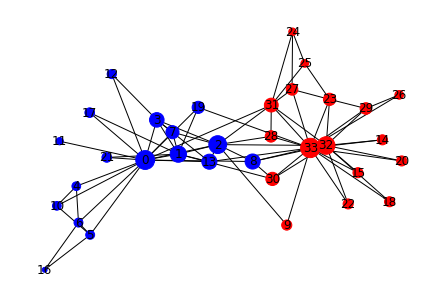

In [141]:
nx.draw(G, with_labels=True, node_size=[1000*degree for degree in eigen_centralities.values()], node_color=colormap)

#### Betweenness Centrality

A node is important if it lies on many shortest paths between other nodes.

<p align="center"><img src="http://www.sciweavers.org/tex2img.php?eq=c_v%20%3D%20%20%5Csum_%7Bs%20%5Cneq%20v%20%5Cneq%20t%7D%20%20%5Cfrac%7B%5C%23%28shortest%5C%20paths%5C%20between%5C%20s%5C%20and%5C%20t%5C%20that%5C%20contain%5C%20v%29%7D%7B%5C%23%28shortest%5C%20paths%5C%20between%5C%20s%5C%20and%5C%20t%29%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="c_v =  \sum_{s \neq v \neq t}  \frac{\#(shortest\ paths\ between\ s\ and\ t\ that\ contain\ v)}{\#(shortest\ paths\ between\ s\ and\ t)} " width="524" height="51" /></p>

Calculate the shortest paths between every node u and v in G using BFS (unweighted) or dijkstra's algorithm (weighted). Store the predecessors of a node when it's the shortest path between itself and another node. Accumulate the number of times a node appears
as a predecessor for all the shortest paths.


[NetworkX Implementation](https://networkx.org/documentation/networkx-1.10/_modules/networkx/algorithms/centrality/betweenness.html#betweenness_centrality)

In [142]:
bc = nx.betweenness_centrality(G, normalized=False)
print("Betweenness Centrality:", bc, end="\n\n")
print("Largest betweenness score (node, score):", max(bc.items(), key=lambda x: x[1]))
print("Smallest betweenness score (node, score):", min(bc.items(), key=lambda x: x[1]))
print(f"Node 0 score: {bc[0]}\nNode 33 score: {bc[33]}")

Betweenness Centrality: {0: 231.0714285714286, 1: 28.478571428571424, 2: 75.85079365079366, 3: 6.288095238095237, 4: 0.3333333333333333, 5: 15.833333333333334, 6: 15.833333333333332, 7: 0.0, 8: 29.529365079365082, 9: 0.44761904761904764, 10: 0.3333333333333333, 11: 0.0, 12: 0.0, 13: 24.215873015873015, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 17.1468253968254, 20: 0.0, 21: 0.0, 22: 0.0, 23: 9.299999999999999, 24: 1.1666666666666665, 25: 2.0277777777777777, 26: 0.0, 27: 11.79206349206349, 28: 0.9476190476190476, 29: 1.5428571428571427, 30: 7.609523809523807, 31: 73.00952380952378, 32: 76.69047619047619, 33: 160.5515873015873}

Largest betweenness score (node, score): (0, 231.0714285714286)
Smallest betweenness score (node, score): (7, 0.0)
Node 0 score: 231.0714285714286
Node 33 score: 160.5515873015873


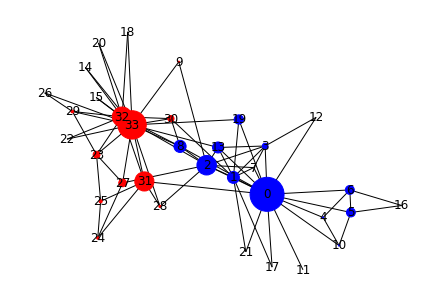

In [143]:
nx.draw(G, with_labels=True, node_size=[5*degree for degree in bc.values()], node_color=colormap)

#### Closeness Centrality

A node is important if it the lenghts of the shortest paths between itself and all the other nodes in the network is minimum.

<p align="center">
<img src="http://www.sciweavers.org/tex2img.php?eq=c_v%20%3D%20%20%5Cfrac%7B1%7D%7B%20%5Csum_%7Bu%20%5Cneq%20v%7D%20shortest%5C%20path%5C%20length%5C%20between%5C%20u%5C%20and%5C%20v%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="c_v =  \frac{1}{ \sum_{u \neq v} shortest\ path\ length\ between\ u\ and\ v} " width="428" height="50" />
</p>

In [144]:
cc = nx.closeness_centrality(G)
print("Betweenness Centrality:", cc, end="\n\n")
print("Largest betweenness score (node, score):", max(cc.items(), key=lambda x: x[1]))
print("Smallest betweenness score (node, score):", min(cc.items(), key=lambda x: x[1]))
print(f"Node 0 score: {cc[0]}\nNode 33 score: {cc[33]}")


Betweenness Centrality: {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}

Largest betweenness score (node, score): (0, 0.5689655172413793)
Smallest betweenness score (node, score): (16, 0.28448275862068967)
Node 0 score: 0.5689655172413793
Node 33 score: 0.55


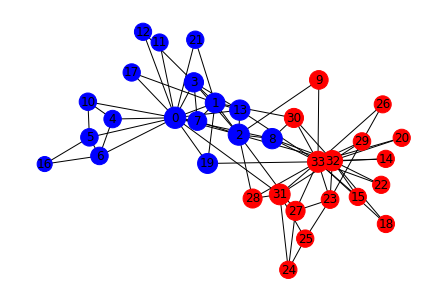

In [145]:
nx.draw(G, with_labels=True, node_size=[800*degree for degree in cc.values()], node_color=colormap)

### Clustering Coefficient

Measures how connected a node's neighborhood is.

<p align="center">
<img src="https://bit.ly/3nHcyNY" align="center" border="0" alt="e_v =  \frac{\#(edges\ among\ neighboring\ nodes)}{\#(node\ pairs\ among\ k_v\ neighboring\ nodes)}  \in   [0, 1]" width="493" height="47" />
</p>

A zero clustering coefficient means no connections between a node's neighboorhood, while a clustering coefficient of 1 means
all of v's neighbors are connected to each other.

<b>Observation</b> 

Clustering coefficient counts the number of triangles in the ego-network, which is the subgraph containing v and it's neighbors.


In [146]:
cc = nx.clustering(G)
print("Clustering Coefficient:", cc, end="\n\n")
print("Largest clustering coefficient (node, score):", max(cc.items(), key=lambda x: x[1]))
print("Smallest clustering coefficient (node, score):", min(cc.items(), key=lambda x: x[1]))
print(f"Node 0 score: {cc[0]}\nNode 33 score: {cc[33]}")

Clustering Coefficient: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}

Largest clustering coefficient (node, score): (7, 1.0)
Smallest clustering coefficient (node, score): (9, 0)
Node 0 score: 0.15
Node 33 score: 0.11029411764705882


## Graphlet Degree Vectors (GDV)

Graphlets are rooted connected non-isomorphic subgraphs. They account for all the possible topologies for n-node subgraphs.
<p align="center">
<img src="https://www.researchgate.net/profile/Oemer-Yaveroglu-2/publication/262690282/figure/fig1/AS:614182361763865@1523443894882/All-2-3-4-and-5-node-graphlets-G-0-G-1-G-29-and-their-automorphism.png" width=600 height=300>
</p>

Different node colors represent different root possibilities.

The Graphlet Degree Vector (GDV) is a count vector of graphlets rooted at a given node. It provides a measure of a node's local network topology. Comparing vetors of two nodes provides a more detailed measure of local tolopogical similarity than node degrees or clustering coefficient.

GDV is a generalization of the clustering coefficient, since it counts many more different types of subgraphs instead of just triangles.

<strong>Didn't find any python implementation</strong>